In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy import stats

%precision 3
pd.set_option('display.precision', 3)


In [93]:
file_temp = '../DATA/대구경북 기온 데이터 19940101-20231231.xlsx'
tempDF = pd.read_excel(file_temp, header=7, index_col=None, parse_dates=True, usecols=[0,2,3,4])
tempDF.columns = ['날짜', '평균기온', '최저기온', '최고기온']
tempDF


,날짜,평균기온,최저기온,최고기온
0,1994-01-01,-0.9,-5.8,4.8
1,1994-01-02,1.8,-4.3,8.9
2,1994-01-03,5.0,0.2,11.0
3,1994-01-04,1.2,-3.0,5.8
4,1994-01-05,1.3,-2.6,7.1
...,...,...,...,...
10952,2023-12-27,2.0,-2.5,8.9
10953,2023-12-28,1.9,-4.0,8.9
10954,2023-12-29,1.8,-3.9,8.5
10955,2023-12-30,2.3,-3.1,7.2


In [94]:
tempDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10957 entries, 0 to 10956
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      10957 non-null  datetime64[ns]
 1   평균기온    10957 non-null  float64       
 2   최저기온    10957 non-null  float64       
 3   최고기온    10957 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 342.5 KB


In [95]:
tempDF.describe()


,날짜,평균기온,최저기온,최고기온
count,10957,10957.000,10957.000,10957.000
mean,2008-12-31 00:00:00,13.024,7.979,18.742
min,1994-01-01 00:00:00,-11.300,-15.700,-7.100
25%,2001-07-02 00:00:00,4.900,-0.500,10.600
50%,2008-12-31 00:00:00,13.900,8.000,20.200
75%,2016-07-01 00:00:00,21.100,16.800,26.500
max,2023-12-31 00:00:00,31.700,26.800,38.200
std,NaN,9.366,9.794,9.393


In [121]:
tempDF['날짜'].dt.year.min()
tempDF['날짜'].dt.year.max()


2023

In [96]:
high_temp = np.array(tempDF['최고기온'])
low_temp = np.array(tempDF['최저기온'])
mean_temp = np.array(tempDF['평균기온'])


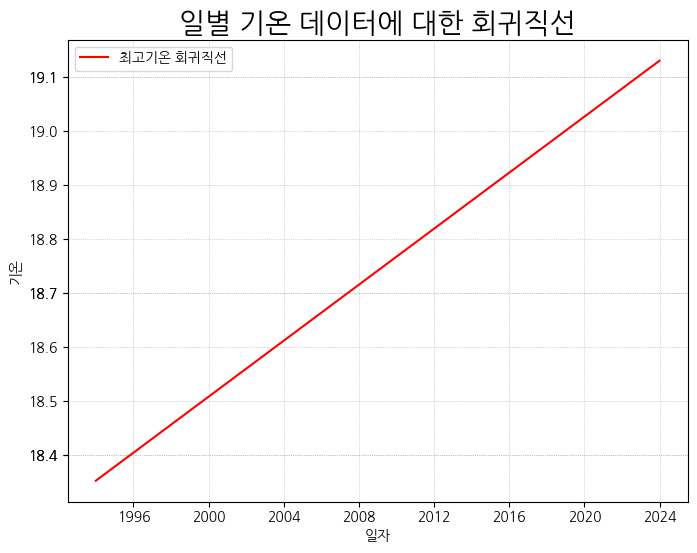

In [163]:
x = np.array(tempDF['날짜'].astype('int64'))
y = high_temp
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# 회귀곡선 데이터 생성
regression_line = slope * x + intercept

# x_year = pd.to_datetime(x)
# 그래프 그리기
plt.figure(figsize=(8,6))
# plt.scatter(x, y, label='실제 데이터')
plt.plot(tempDF['날짜'], regression_line, color='red', label='최고기온 회귀직선')
plt.xlabel('일자')
plt.ylabel('기온')
plt.yticks((np.linspace(regression_line.min(), regression_line.max(), 11)).round(1))
plt.title('일별 기온 데이터에 대한 회귀직선', fontsize=20)
plt.grid(ls=':', lw=0.5)
plt.legend()
plt.show()


In [145]:
pd.date_range(start='2024-01-01', end='2123-12-31')


DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2123-12-22', '2123-12-23', '2123-12-24', '2123-12-25',
               '2123-12-26', '2123-12-27', '2123-12-28', '2123-12-29',
               '2123-12-30', '2123-12-31'],
              dtype='datetime64[ns]', length=36524, freq='D')

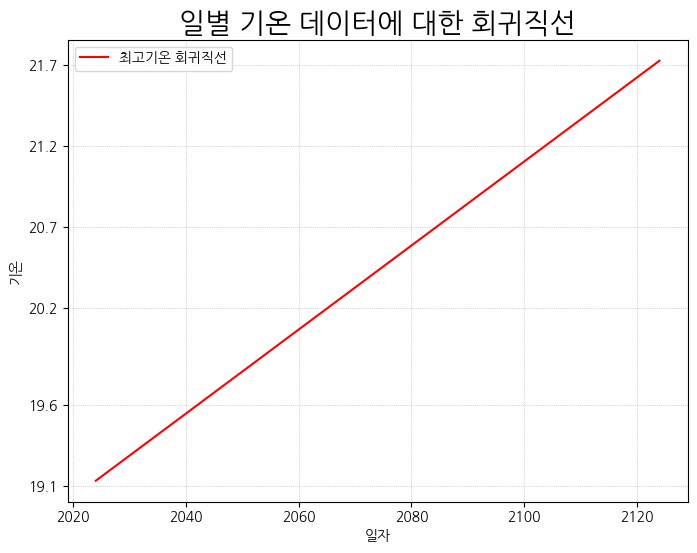

In [166]:
new_date = pd.date_range(start='2024-01-01', end='2123-12-31')
new_x = np.array(new_date.astype('int64'))
regression_line1 = slope * new_x + intercept

# x_year = pd.to_datetime(x)
# 그래프 그리기
plt.figure(figsize=(8,6))
# plt.scatter(x, y, label='실제 데이터')
plt.plot(new_date, regression_line1, color='red', label='최고기온 회귀직선')
plt.xlabel('일자')
plt.ylabel('기온')
plt.yticks((np.linspace(regression_line1.min(), regression_line1.max(), 6)).round(1))
plt.title('일별 기온 데이터에 대한 회귀직선', fontsize=20)
plt.grid(ls=':', lw=0.5)
plt.legend()
plt.show()


In [148]:
tempDF['날짜'].dt.year.unique()


array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [151]:
list1 = []
for year in tempDF['날짜'].dt.year.unique():
    list1.append(tempDF[tempDF['날짜'].dt.year == year]['최고기온'].max())

# tempDF[tempDF['날짜'].dt.year == 2023]['최고기온'].max()
list1


[36.500,
 36.900,
 35.600,
 34.800,
 33.500,
 32.900,
 33.900,
 35.000,
 33.900,
 33.900,
 35.900,
 34.900,
 35.100,
 34.900,
 34.900,
 34.300,
 34.600,
 33.900,
 35.700,
 36.500,
 34.700,
 36.200,
 36.900,
 35.900,
 38.200,
 35.100,
 34.600,
 34.500,
 35.100,
 35.300]

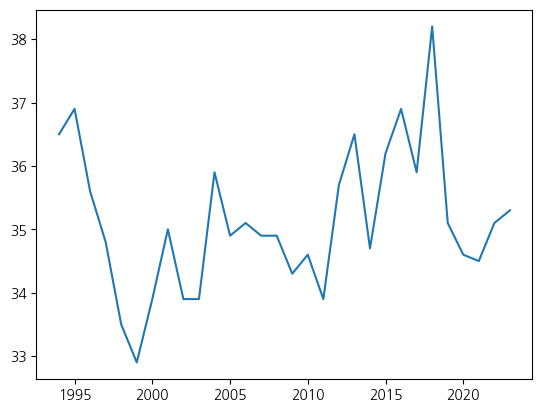

In [153]:
plt.plot(tempDF['날짜'].dt.year.unique(), list1)


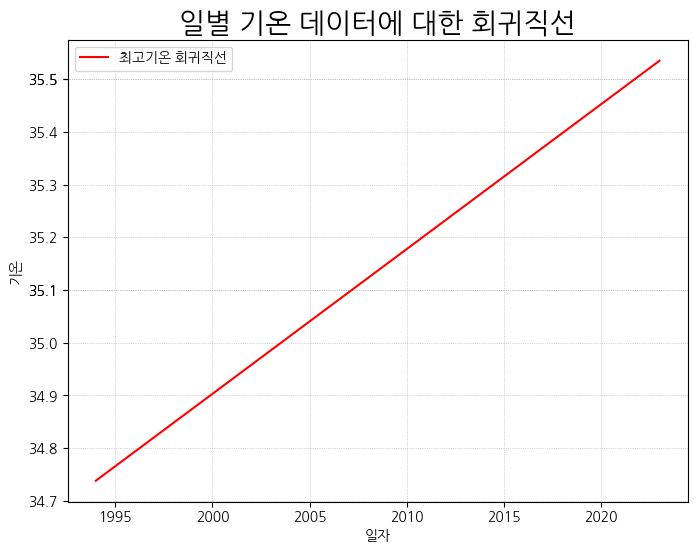

In [174]:
x1 = tempDF['날짜'].dt.year.unique()
y1 = list1
slope1, intercept1, r_value, p_value, std_err = stats.linregress(x1, y1)

# 회귀곡선 데이터 생성
regression_line2 = slope1 * x1 + intercept1

# x_year = pd.to_datetime(x)
# 그래프 그리기
plt.figure(figsize=(8,6))
# plt.scatter(x, y, label='실제 데이터')
plt.plot(x1, regression_line2, color='red', label='최고기온 회귀직선')
plt.xlabel('일자')
plt.ylabel('기온')
plt.yticks((np.linspace(regression_line2.min(), regression_line2.max(), 11)).round(1))
plt.title('일별 기온 데이터에 대한 회귀직선', fontsize=20)
plt.grid(ls=':', lw=0.5)
plt.legend()
plt.show()


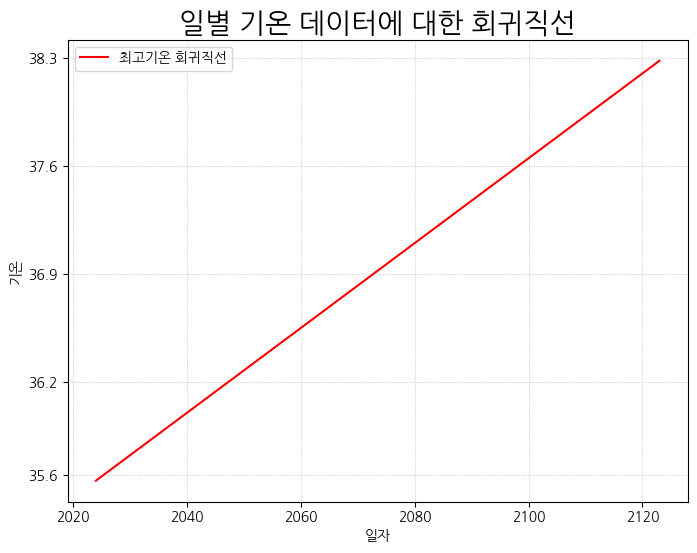

In [178]:
new_date = np.arange(2024, 2124)
regression_line3 = slope1 * new_date + intercept1

# x_year = pd.to_datetime(x)
# 그래프 그리기
plt.figure(figsize=(8,6))
# plt.scatter(x, y, label='실제 데이터')
plt.plot(new_date, regression_line3, color='red', label='최고기온 회귀직선')
plt.xlabel('일자')
plt.ylabel('기온')
plt.yticks((np.linspace(regression_line3.min(), regression_line3.max(), 5)).round(1))
plt.title('일별 기온 데이터에 대한 회귀직선', fontsize=20)
plt.grid(ls=':', lw=0.5)
plt.legend()
plt.show()
